In [1]:
from tqst_class import *

In [2]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()
print(nq)
N=nq**2

diagonal = np.zeros(N)
diagonal[0]=1/2
diagonal[3]=1/2
# diagonal[12]=1/4
# diagonal[15]=1/4
print(diagonal)
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 2.
2
[0.5 0.  0.  0.5]
Diagonal counts are now set.
The threshold is now set to 0.16666666666666666.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+
nb of measurement necessary:  (2,)


1. dare i veri valori della diagonale

In [3]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_18Dic_Diag_Diego_tb'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]
diag_type_TB=data[:,6]
diag_type_FB=data[:,9]

## Order the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]
diag_type_TB=diag_type_TB[sorted_indexes]
diag_type_FB=diag_type_FB[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)
print("Type time-bin, ordered:", diag_type_TB)
print("Type freq-bin, ordered:", diag_type_FB)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
# tomo.set_diagonal_counts(diag_coinc_arr)

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_9052\994889283.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_18Dic_Diag_Diego_tb'


Loading...  \Tomo_18Dic_Diag_Diego_tb
Sorted Binary Strings: ['00', '01', '10', '11']
Original Indexes: [0, 1, 2, 3]
original coinc: [' 276.0' ' 0.0' ' 2.0' ' 214.0']
diag_coinc, ordered: [' 276.0' ' 0.0' ' 2.0' ' 214.0']
Type time-bin, ordered: [' 00' ' 01' ' 10' ' 11']
Type freq-bin, ordered: [' 00' ' 00' ' 00' ' 00']


In [4]:
## if you want to calculate again the projector with the measured diagonal elements

gini = dmt.gini_index(diag_coinc_arr)
# threshold = tomo.set_threshold(gini)
threshold=0.1

offd_projs = tomo.get_projs_to_measure()

These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+


2. dare i counts misurati per ciascun proiettore (ancora ideali)

In [5]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename='\Tomo_18Dic_all_Diego_tb'
fpath=DIR+folder+filename

### Proj, Coinc, ph_s0, ph_i0, ph_s1, ph_i1, type_tb, ph_RF_s, ph_RF_i, type_fb
print("Loading... ", filename)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)
settings_TB=np.zeros([4,len(data)])
settings_FB=np.zeros([2,len(data)])

proj_name=data[:,0]
print(proj_name)
coinc=data[:,1]
settings_TB[0,:]=data[:,2]
settings_TB[1,]=data[:,3]
settings_TB[2,:]=data[:,4]
settings_TB[3,:]=data[:,5]
type_TB=data[:,6]
settings_FB[0,:]=data[:,7]
settings_FB[1,:]=data[:,8]
settings_FB=np.deg2rad(settings_FB)
type_FB=data[:,9]
# Convert each string to a float
coinc_arr = np.asarray([float(x) for x in coinc])
print(coinc_arr)

Loading...  \Tomo_18Dic_all_Diego_tb
['DD' 'DR']
[982. 544.]


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_9052\2287254849.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename='\Tomo_18Dic_all_Diego_tb'


Diagonal counts are now set.
(6, 4)
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


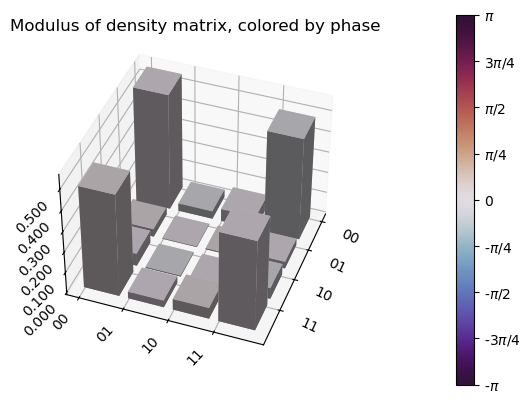

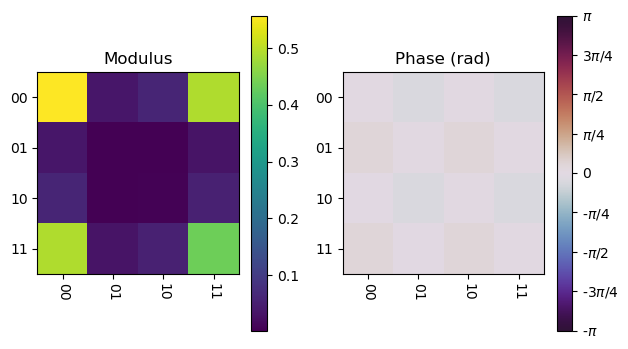

In [6]:
# coinc_arr.transpose()
# proj_name.transpose()
tomo.set_diagonal_counts(diag_coinc_arr/np.sum(diag_coinc_arr))
tomo.set_projs_and_counts(proj_name, coinc_arr/np.sum(coinc_arr))
projs, counts = tomo.get_projs_and_counts()
print(np.shape(projs))
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)
dmt.plot_density_matrix_2D(rho_rec)

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


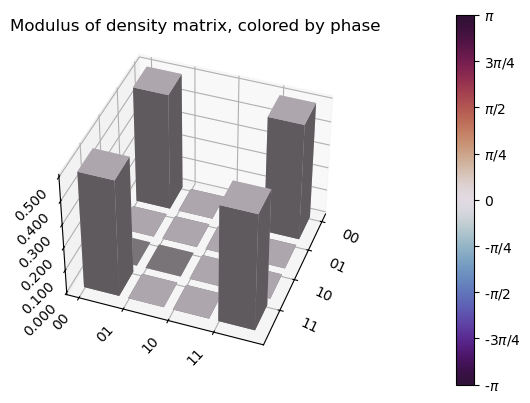

0.9909418870438805
0.9999978822867617


In [7]:
## Ideal density matrix

psi_true=np.zeros(N)
psi_true[0]=1/np.sqrt(2)
psi_true[3]=1/np.sqrt(2)
# psi_true[12]=1/2
# psi_true[15]=1/2
rho_true=np.outer(psi_true,psi_true)

dmt.plot_density_matrix_3D(rho_true)

f=dmt.fidelity(rho_rec,rho_true)
print(f)
pur=dmt.purity(rho_rec)
print(pur)

3. Now let's set our real projectors...

TO be considered:
- losses (to implement)
- post selection factors


In [8]:
def W_tb_si_func(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1.0j)
    W[1,0]=Csl*np.exp((phs_s+phi_l)*1.0j)
    W[2,0]=Cls*np.exp((phs_l+phi_s)*1.0j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1.0j)
    W[1,1]= W[0,0]
    W[2,2]= W[0,0]
    W[3,3]= W[0,0]
    W[3,1]= W[2,0]
    W[3,2]= W[1,0]
    
    return W

def W_fb_func(J0, J1, J_1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0] = J0
    W[1,1] = W[0,0]
    W[0,1] = J1*np.exp(theta*1.0j)
    W[1,0] = J_1*np.exp(-theta*1.0j)

    return W

def W_fb_si_func(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
    W_s=W_fb_func(J0_s, J1_s, J_1_s, ph_s)
    W_i=W_fb_func(J0_i, J1_i, J_1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W


In [22]:
## try if the matrixes work

# W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l)
W_tb_si=W_tb_si_func(1.4, 1.2, 1.1, 1.0, 0, 0, 0.0, np.pi/2)
print(W_tb_si.conj().T)

# W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
W_fb_si=W_fb_si_func(1,1,1,0,1,1,1,0)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)

[[1.40000000e+00-0.j  7.34788079e-17-1.2j 1.10000000e+00-0.j
  6.12323400e-17-1.j ]
 [0.00000000e+00-0.j  1.40000000e+00-0.j  0.00000000e+00-0.j
  1.10000000e+00-0.j ]
 [0.00000000e+00-0.j  0.00000000e+00-0.j  1.40000000e+00-0.j
  7.34788079e-17-1.2j]
 [0.00000000e+00-0.j  0.00000000e+00-0.j  0.00000000e+00-0.j
  1.40000000e+00-0.j ]]
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
[[1.40000000e+00+0.j  1.40000000e+00+0.j  1.40000000e+00+0.j
  1.40000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j ]
 [1.40000000e+00+0.j  1.40000000e+00+0.j  1.40000000e+00+0.j
  1.40000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.000

Ideal proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj diag:  [0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j]
Ideal proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Exp proj diag:  [0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Exp proj diag:  [0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Exp proj diag:  [0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j]


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


Coinc diag:  [0.56097561 0.         0.00406504 0.43495935 0.         0.        ]
superposition tb
Base:  VV
Proj:  DD
(0.25, 0.25, 0.25, 0.25, 0, 0, 0.0, 0.0)
Ideal proj:  [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
Exp proj:  [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
superposition tb
Base:  VV
Proj:  DR
(0.25, 0.25, 0.25, 0.25, 0, 0, 0.0, 1.5708)
Ideal proj:  [0.5+0.j  0. +0.5j 0.5+0.j  0. +0.5j]
Exp proj:  [-9.18301276e-07-0.25j  2.50000000e-01+0.j   -9.18301276e-07-0.25j
  2.50000000e-01+0.j  ]
(6, 4)
[0.56097561 0.         0.00406504 0.43495935 0.64351245 0.35648755]


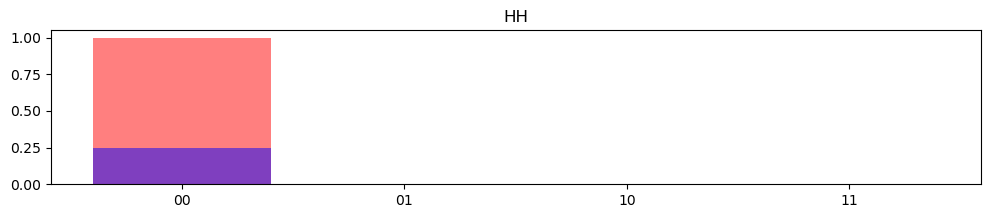

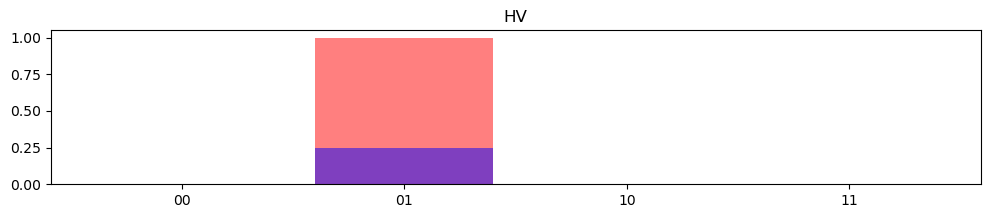

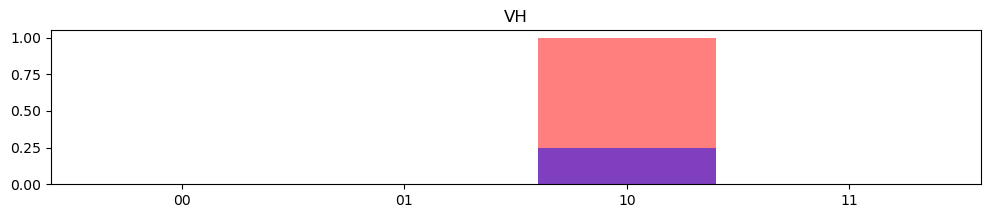

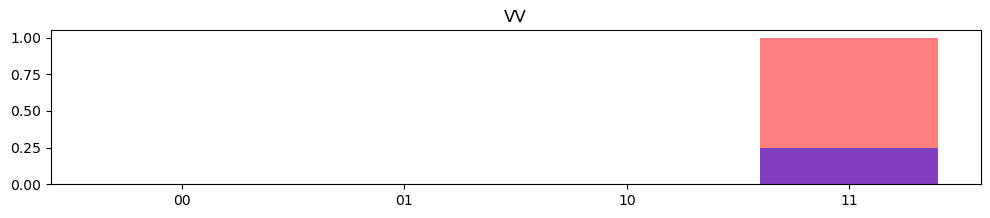

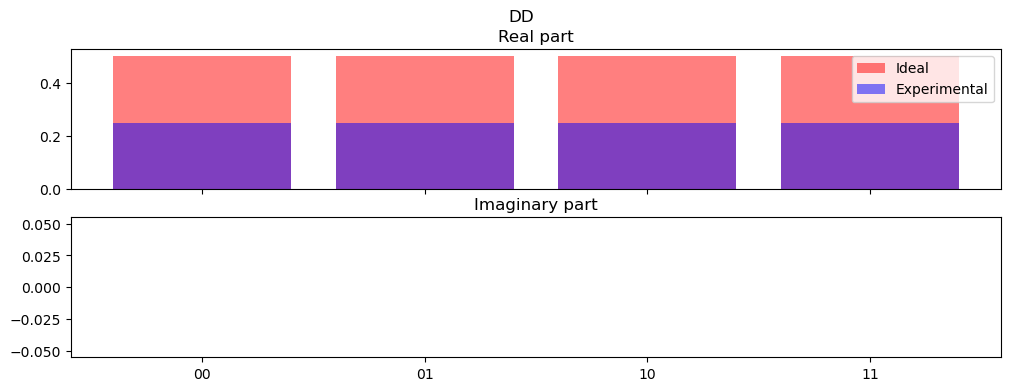

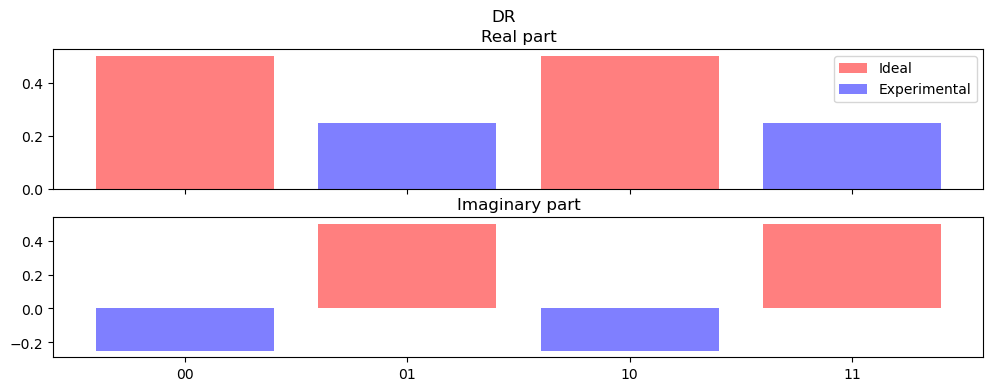

In [ ]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HH','HV','VH','VV'])
NbProj=len(offd_projs)
base = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj+N,N], dtype=np.complex128)
Coinc_exp = np.zeros([NbProj+N])

# C_arr=np.array([1.42732558, 1.20348837, 1.2005814,  1.])
C_arr=np.ones(4)/4
Ctot=np.sum(C_arr)
# C_arr=C_arr/Ctot*2

for i in range(N):

    Coinc_exp[i]=diag_coinc_arr[i]/np.sum(diag_coinc_arr)
    base[i,:]=prj.extended_projector_from_string(diag_name[i])
    Proj[i,:]=prj.extended_projector_from_string(diag_name[i])
    # print(diag_name[i])

    ## FB, for the basis, the modulator is always OFF
    J0=1.0
    J1=0.0
    J_1=0.0

    if diag_type_TB[i]==' 00':
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0

    if diag_type_TB[i]==' 01':
        Css=C_arr[1]
        Csl=0
        Cls=0
        Cll=0

    if diag_type_TB[i]==' 10':
        Css=C_arr[2]
        Csl=0
        Cls=0
        Cll=0
    
    if diag_type_TB[i]==' 11':
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0

    ## for each projector, define the matrix Wexp with the correct parameters
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,0,0)
    Wexp=W_tb_si
    # print(W_tb_si)
    # W_fb_si=W_fb_si_func(J0,J1,J_1,0.0,J0,J1,J_1,0.0)
    # print(W_fb_si)
    # Wexp=np.kron(W_tb_si.conj(),W_fb_si)
    # proj_2=np.outer(Proj[i,:],Proj[i,:])
    # W=np.matmul(Wexp.conj().T,proj_2)
    Wexp_2=Wexp.conj().T
    Proj_exp[i,:]=np.dot(Wexp_2,base[i,:])
    print('Ideal proj diag: ', Proj[i,:])
    print('Exp proj diag: ', Proj_exp[i,:])

    ## plot projector (diag)
    fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
    ax.bar(sorted_strings,Proj[i,:], label='Ideal', color='red', alpha=0.5)
    ax.bar(sorted_strings,Proj_exp[i,:], label='Experimental', color='blue', alpha=0.5)
    ax.set_title(diag_name[i])
# print('Coinc with losses:', np.matmul(Proj_exp,Coinc_exp))
   
print('Coinc diag: ', Coinc_exp)

for p in range(NbProj):

    Css=C_arr[0]
    Csl=C_arr[1]
    Cls=C_arr[2]
    Cll=C_arr[3]

    if type_TB[p]==' ss':
        string_TB='HH'
    if type_TB[p]==' sl':
        string_TB='HV'
    if type_TB[p]==' ls':
        string_TB='VH'
    if type_TB[p]==' ll':
        string_TB='VV'

    if type_FB[p]==' 00':
        string_FB='HH'
    if type_FB[p]=='01':
        string_FB='HV'
    if type_FB[p]==' 10':
        string_FB='VS'
    if type_FB[p]==' 11':
        string_FB='VV'

    # if proj_name[p][0:2]=='DD' or proj_name[p][0:2]=='DR' or proj_name[p][0:2]=='RD' or proj_name[p][0:2]=='RR':
    #     print('superposition tb')
        # string_TB='VV'
    # elif proj_name[p][0:2]=='HH':
    #     # print('not superposition tb :', proj_name[p][2:4])
    #     Css=C_arr[0]
    #     Csl=0
    #     Cls=0
    #     Cll=0
    #     # string_TB='HH'
    # elif proj_name[p][0:2]=='VV':
    #     # print('not superposition tb :', proj_name[p][2:4])
    #     Css=C_arr[3]
    #     Csl=0
    #     Cls=0
    #     Cll=C_arr[3]
    #     # string_TB='VV'

    if type_TB[p]==' 2l2l':
        print('2l2l case')
        string_TB='VV'
        Css=0
        Csl=0
        Cls=0
        Cll=C_arr[3]

    pr=p+N
    base[pr,:]=prj.extended_projector_from_string(string_TB)
    print('Base: ', string_TB)
    # print(base[pr,:])
    ## for each projector, define the matrix Wexp with the correct parameters
    print('Proj: ', proj_name[p])

    if settings_TB[3,p]==-1.0:
        settings_TB[3,p]=0.0

    
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p])
    print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    Wexp=W_tb_si
    # print(W_tb_si)
    # W_fb_si=W_fb_si_func(J0,J1,J_1,settings_FB[0,p],J0,J1,J_1,settings_FB[1,p])
    # print((J0,J1,J_1,settings_FB[0,p],J0,J1,J_1,settings_FB[1,p]))
    # print(W_fb_si)
    # Wexp=np.kron(W_tb_si.conj(),W_fb_si)
    # print(Wexp)
    ######

    Proj[pr,:]=prj.extended_projector_from_string(proj_name[p])
    Wexp_2=Wexp.conj().T

    print('Ideal proj: ', Proj[pr,:])
    Coinc_exp[pr]=coinc_arr[p]/np.sum(coinc_arr)
    Proj_exp[pr,:]=np.dot(Wexp_2,base[pr,:])
    print('Exp proj: ', Proj_exp[pr,:])

    ##plot projectors
    fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)
    axr.bar(sorted_strings,np.real(Proj[pr,:]), label='Ideal', color='red', alpha=0.5)
    axr.bar(sorted_strings,np.real(Proj_exp[pr,:]), label='Experimental', color='blue', alpha=0.5)
    axr.set_title('Real part')
    axi.bar(sorted_strings,np.imag(Proj[pr,:]), label='Ideal', color='red', alpha=0.5)
    axi.bar(sorted_strings,np.imag(Proj_exp[pr,:]), label='Experimental', color='blue', alpha=0.5)
    axi.set_title('Imaginary part')
    fig.suptitle(proj_name[p])
    axr.legend()

# print(proj_name)
# print(Proj_exp)
print(Proj_exp.shape)
print(Coinc_exp)

# Proj_exp_2=np.outer(Proj_exp,Proj_exp)
## shoud I do the same also for the diagonal elements ??? 

In [26]:
base[pr,:]

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


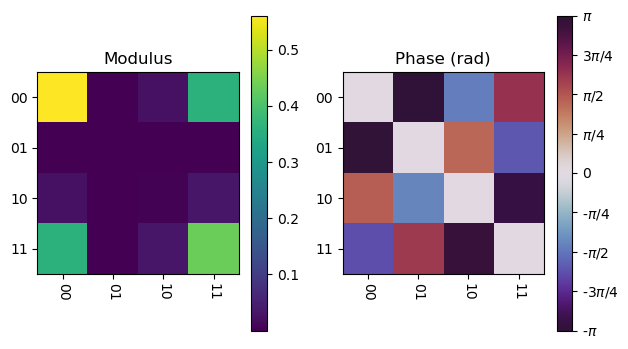

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


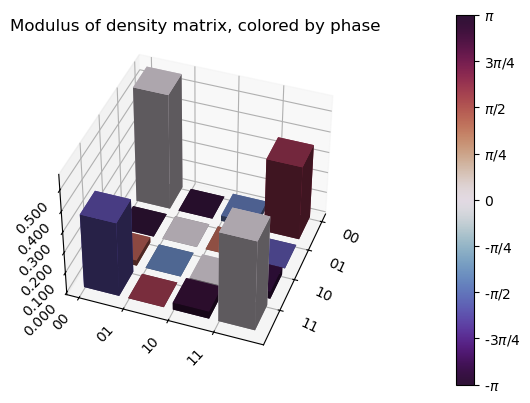

Fidelity:  0.5934402711906999
Purity:  0.7671356643683251


In [27]:
# tomo.set_projs_and_counts(proj_name, coinc_arr)
# projs, counts = tomo.get_projs_and_counts()
# print(np.shape(projs))
# print(projs)
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp)
# rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp/np.sum(diag_coinc_arr))

dmt.plot_density_matrix_2D(rho_rec)
dmt.plot_density_matrix_3D(rho_rec)

f=dmt.fidelity(rho_rec,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec)
print('Purity: ', pur)